# Activity: Full OSEMN

## Introduction

In this assignment, you will work on a data analysis project. This project will
let you practice the skills you have learned in this course and write real code
in Python.

You will perform the following steps of the OSEMN framework:  
- [Scrub](#scrub)
- [Explore](#explore)
- [Interpret](#interpret)

In [2]:
# We'll import the libraries you'll likely use for this activity
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
df = pd.read_csv('transactions-pet_store.csv')
df_orig = df.copy()

In [2]:
df.head()

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Size,Quantity,Product_Category,Product_Line
0,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Feline Fix Mix,RKAPY3I1TP,39.55,NaN,1,treat,cat
1,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Scratchy Post,MPH6SCD7UT,26.95,NaN,3,toy,cat
2,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Reddy Beddy,DJWE1V9LZK,23.07,large,3,bedding,dog
3,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Snoozer Essentails,GABWVMEL2R,28.04,NaN,3,bedding,dog
4,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Reddy Beddy,KDTMPSBZKZ,13.84,small,1,bedding,dog


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2903 non-null   object 
 1   Order_Number      2903 non-null   object 
 2   Customer_ID       2853 non-null   object 
 3   Product_Name      2874 non-null   object 
 4   SKU               2903 non-null   object 
 5   Price             2903 non-null   float64
 6   Size              658 non-null    object 
 7   Quantity          2903 non-null   int64  
 8   Product_Category  2758 non-null   object 
 9   Product_Line      2901 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 226.9+ KB


In [4]:
df.describe()

,Price,Quantity
count,2903.000000,2903.000000
mean,25.642697,1.995866
std,521.785686,0.818032
min,-19873.000000,1.000000
25%,17.160000,1.000000
50%,25.480000,2.000000
75%,34.380000,3.000000
max,19873.000000,3.000000


## Scrub

You will scrub the data. It's important that you follow the directions as
stated. Doing more or less than what is asked might lead to not getting full
points for the question.

------

If while you're working on the scrubbing phase you need to reset the DataFrame,
you can restart the kernel (in the toolbar: "Kernel" > "Restart").

#### Question 1

Remove all rows that have are missing either the `Product_Name` or the
`Product_Category`. Assign the cleaned DataFrame to the variable `df`
(overwriting the original DataFrame.).

In [5]:
# Your code here
df = df.dropna(subset=["Product_Name","Product_Category"])
# your code here

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2758 entries, 0 to 2902
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2758 non-null   object 
 1   Order_Number      2758 non-null   object 
 2   Customer_ID       2716 non-null   object 
 3   Product_Name      2758 non-null   object 
 4   SKU               2758 non-null   object 
 5   Price             2758 non-null   float64
 6   Size              626 non-null    object 
 7   Quantity          2758 non-null   int64  
 8   Product_Category  2758 non-null   object 
 9   Product_Line      2758 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 237.0+ KB


In [7]:
# Question 1 Grading Checks

assert df.shape[0] <= 2874, 'Did you remove all the rows with missing values for the columns Product_Name & Product_Category?'
assert df.shape[0] >= 2700, 'Did you remove too many the rows with missing values?'
assert len(df.columns) == 10, 'Make sure you do not drop any columns.'

#### Question 2

Find any clearly "incorrect" values in the `Price` column and "clean" the
DataFrame to address those values.

Ensure you make the changes to the DataFrame assigned to the variable `df`.

In [8]:
# Your code here
# Define quantile cutoffs
low = df["Price"].quantile(0.0001)
high = df["Price"].quantile(0.999)

# Keep only reasonable prices
df = df[(df["Price"] >= low) & (df["Price"] <= high)]

# your code here
df

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Size,Quantity,Product_Category,Product_Line
0,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Feline Fix Mix,RKAPY3I1TP,39.55,NaN,1,treat,cat
1,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Scratchy Post,MPH6SCD7UT,26.95,NaN,3,toy,cat
2,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Reddy Beddy,DJWE1V9LZK,23.07,large,3,bedding,dog
3,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Snoozer Essentails,GABWVMEL2R,28.04,NaN,3,bedding,dog
4,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Reddy Beddy,KDTMPSBZKZ,13.84,small,1,bedding,dog
...,...,...,...,...,...,...,...,...,...,...
2898,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Cat Cave,058G0P7V60,29.66,NaN,1,bedding,cat
2899,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Kitty Climber,W86BRJ9SSG,39.32,NaN,1,toy,cat
2900,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Fetch Blaster,M291KHJ4LW,29.47,NaN,1,toy,dog
2901,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Snoozer Essentails,GABWVMEL2R,28.04,NaN,1,bedding,dog


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2756 entries, 0 to 2902
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2756 non-null   object 
 1   Order_Number      2756 non-null   object 
 2   Customer_ID       2714 non-null   object 
 3   Product_Name      2756 non-null   object 
 4   SKU               2756 non-null   object 
 5   Price             2756 non-null   float64
 6   Size              626 non-null    object 
 7   Quantity          2756 non-null   int64  
 8   Product_Category  2756 non-null   object 
 9   Product_Line      2756 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 236.8+ KB


In [10]:
# Question 2 Grading Checks

assert (df.Price < df.Price.quantile(0.0001)).sum() == 0, 'Check for very small values'
assert (df.Price > df.Price.quantile(0.999)).sum() == 0, 'Check for very large values'

#### Question 3

After you've done the cleaning above, remove any column that has more than `500`
missing values.

Ensure you make the changes to the DataFrame assigned to the variable `df`.

In [11]:
# Your code here
df = df.drop(columns=["Size"])
# your code here

In [12]:
# Question 3 Grading Checks

assert len(df.columns) < 10, 'You should have dropped 1 or more columns (with more than 500 missing values)'

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2756 entries, 0 to 2902
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2756 non-null   object 
 1   Order_Number      2756 non-null   object 
 2   Customer_ID       2714 non-null   object 
 3   Product_Name      2756 non-null   object 
 4   SKU               2756 non-null   object 
 5   Price             2756 non-null   float64
 6   Quantity          2756 non-null   int64  
 7   Product_Category  2756 non-null   object 
 8   Product_Line      2756 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 215.3+ KB


#### Question 4

Address the other missing values. You can replace the values or remvove them,
but whatever method you decide to clean the DataFrame, you should no longer have
any missing values.

Ensure you make the changes to the DataFrame assigned to the variable `df`.

In [18]:
df[df["Customer_ID"].isnull()]

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Quantity,Product_Category,Product_Line
46,12/27/2019,79H-3431-3268-7134,NaN,Purrfect Puree,28LQOI0LSK,19.96,1,treat,cat
65,7/27/2019,0R0-5522-3689-6676,NaN,Chewie Dental,CG3531YP08,38.17,3,treat,dog
97,4/22/2020,D3I-6237-1649-0772,NaN,Tug-a-Back,IZBHF5KR79,21.82,1,toy,dog
190,8/27/2020,JU8-6095-9547-1038,NaN,Kitty Climber,W86BRJ9SSG,39.32,1,toy,cat
222,3/8/2021,TLN-8911-4517-9526,NaN,Tuna Tasties,A8SU9C4GLF,14.53,3,treat,cat
337,6/21/2021,W3P-0661-6436-1039,NaN,Tuna Tasties,A8SU9C4GLF,14.53,3,treat,cat
371,6/6/2020,WTX-0831-3244-6158,NaN,Reddy Beddy,KDTMPSBZKZ,13.84,3,bedding,dog
416,4/29/2021,X9F-5795-2281-4100,NaN,Chomp-a Plush,3HDX5H4WTM,39.24,3,toy,dog
420,7/19/2020,2OI-1191-6735-8296,NaN,Scratchy Post,MPH6SCD7UT,26.95,1,toy,cat
443,5/24/2019,7K8-7630-3319-4712,NaN,Reddy Beddy,KDTMPSBZKZ,13.84,2,bedding,dog


In [20]:
# Your code here
df["Customer_ID"] = df["Customer_ID"].fillna("Unknown")
# your code here

In [21]:
# Question 4 Grading Checks

assert df.Customer_ID.isna().sum() == 0, 'Did you address all the missing values?'

## Explore

You will explore the data. It's important that you follow the directions as
stated. Doing more or less than what is asked might lead to not getting full
points for the question.

You may use either exploratory statistics or exploratory visualizations to help
answer these questions.

------

Note that the DataFrame loaded for this section (in the below cell) is different
from the data you used in the [Scrub](#scrub) section.

If while you're working on the scrubbing phase you need to reset the DataFrame,
you can restart the kernel (in the toolbar: "Kernel" > "Restart").

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('transactions-pet_store-clean.csv')

In [3]:
df.head()

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Quantity,Product_Category,Product_Line
0,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Feline Fix Mix,RKAPY3I1TP,39.55,1,treat,cat
1,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Scratchy Post,MPH6SCD7UT,26.95,3,toy,cat
2,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Reddy Beddy,DJWE1V9LZK,23.07,3,bedding,dog
3,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Snoozer Essentails,GABWVMEL2R,28.04,3,bedding,dog
4,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Reddy Beddy,KDTMPSBZKZ,13.84,1,bedding,dog


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2714 entries, 0 to 2713
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2714 non-null   object 
 1   Order_Number      2714 non-null   object 
 2   Customer_ID       2714 non-null   object 
 3   Product_Name      2714 non-null   object 
 4   SKU               2714 non-null   object 
 5   Price             2714 non-null   float64
 6   Quantity          2714 non-null   int64  
 7   Product_Category  2714 non-null   object 
 8   Product_Line      2714 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 191.0+ KB


#### Question 5

Create a `Subtotal` column by multiplying the `Price` and `Quantity` values. 
This represents how much was spent for a given transaction (row).

In [3]:
# Your code here
df["Subtotal"] = df["Price"] * df["Quantity"]

# your code here

In [4]:
# Question 5 Grading Checks

assert 'Subtotal' in df.columns, ''

In [5]:
df.head(10)

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Quantity,Product_Category,Product_Line,Subtotal
0,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Feline Fix Mix,RKAPY3I1TP,39.55,1,treat,cat,39.55
1,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Scratchy Post,MPH6SCD7UT,26.95,3,toy,cat,80.85
2,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Reddy Beddy,DJWE1V9LZK,23.07,3,bedding,dog,69.21
3,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Snoozer Essentails,GABWVMEL2R,28.04,3,bedding,dog,84.12
4,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Reddy Beddy,KDTMPSBZKZ,13.84,1,bedding,dog,13.84
5,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Whole Chemistry Recipe,6K4AUUS730,18.53,3,food,dog,55.59
6,5/16/2021,SZA-5970-0614-1888,ea312d55-2d53-4d0b-99f4-f7b7b1080d53,Reddy Beddy,DJWE1V9LZK,23.07,3,bedding,dog,69.21
7,9/21/2019,ENT-5271-0660-4850,d13c8860-67ae-44fb-8827-7afa9b4eec7a,Cat Cave,058G0P7V60,29.66,2,bedding,cat,59.32
8,9/21/2019,ENT-5271-0660-4850,d13c8860-67ae-44fb-8827-7afa9b4eec7a,Chewie Dental,CG3531YP08,38.17,1,treat,dog,38.17
9,1/5/2020,14C-6286-0019-4676,e7b79f56-2196-49a0-852a-3d329ad7cb57,Tug-a-Back,IZBHF5KR79,21.82,3,toy,dog,65.46


#### Question 6

Determine most common category (`Product_Category`) purchases (number of total
items) for both `Product_Line` categories. Assign the (string) name of these
categories to their respective variables `common_category_cat` & 
`common_category_dog`.

In [31]:
common_category_cat = (
    df[df["Product_Line"]=="cat"]
    .groupby("Product_Category")["Quantity"].sum()
    .idxmax()
)

common_category_dog = (
    df[df["Product_Line"]=="dog"]
    .groupby("Product_Category")["Quantity"].sum()
    .idxmax()
)


In [32]:
# Question 6 Grading Checks

assert isinstance(common_category_dog, str), 'Ensure you assign the name of the category (string) to the variable common_category_dog'
assert isinstance(common_category_cat, str), 'Ensure you assign the name of the category (string) to the variable common_category_cat'

#### Question 7

Determine which categories (`Product_Category`), by `Product_Line` have the
***median*** highest `Price`.
Assign the (string) name of these categories to their respective variables
`priciest_category_cat` & `priciest_category_dog`.

In [8]:
# Your code here
priciest_category_cat = (
    df[df["Product_Line"]=="cat"]
    .groupby("Product_Category")["Price"].median()
    .idxmax()
)

priciest_category_dog = (
    df[df["Product_Line"]=="dog"]
    .groupby("Product_Category")["Price"].median()
    .idxmax()
)

# your code here

In [9]:
# Question 7 Grading Checks

assert isinstance(priciest_category_dog, str), 'Ensure you assign the name of the category (string) to the variable priciest_category_dog'
assert isinstance(priciest_category_cat, str), 'Ensure you assign the name of the category (string) to the variable priciest_category_cat'

## Modeling

This is the point of the framework where we'd work on modeling with our data.
However, in this activity, we're going to move straight to interpretting.

## Interpret

You will interpret the data based on what you found so far. It's important that
you follow the directions as stated. Doing more or less than what is asked might
lead to not getting full points for the question.


------

Note that the DataFrame loaded for this section (in the below cell) is the same
as the data you used in the [Explore](#explore) section.

If while you're working on the scrubbing phase you need to reset the DataFrame,
you can restart the kernel (in the toolbar: "Kernel" > "Restart").

#### Question 8

You want to emphasize to your stakeholders that the total number of product
categories sold differ between the two `Product_Line` categories (`'cat'` & 
`'dog'`).

Create a **_horizontal_ bar plot** that has `Product_Category` on the y-axis and
the total number of that category sold (using the `Quantity`) by each 
`Product_Line` category. Also **change the axis labels** to something meaningful
and add a title.

You will likely want to use Seaborn. Make sure you set the result to the
variable `ax` like the following:
```python
ax = # code to create a bar plot
```

Text(0.5, 1.0, 'Total Items Sold by Category and Product Line')

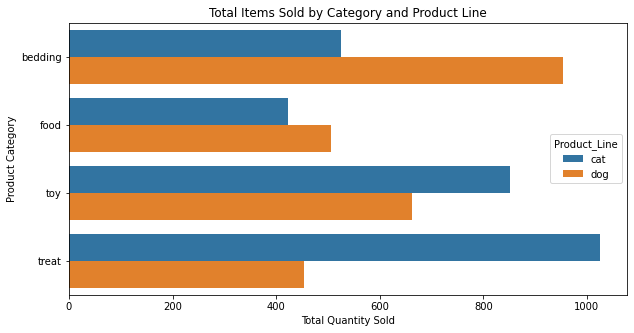

In [34]:
cat_summary = (
    df.groupby(["Product_Line", "Product_Category"])["Quantity"].sum().reset_index()
)

plt.figure(figsize=(10, 5))

ax = sns.barplot(
    data=cat_summary,
    x="Quantity", y="Product_Category",
    hue="Product_Line", orient="h"
)

ax.set_xlabel("Total Quantity Sold")
ax.set_ylabel("Product Category")
ax.set_title("Total Items Sold by Category and Product Line")


In [23]:
# Question 8 Grading Checks

assert isinstance(ax, plt.Axes), 'Did you assign the plot result to the variable ax?'

#### Question 9

Based on the plot from [Question 8](#question-8), what would you conclude for
your stakeholders about what products they should sell? What would be the
considerations and/or caveats you'd communicate to your stakeholders?

Write at least a couple sentences of your thoughts in a string assigned to the
variable `answer_to_9`.

The cell below should look something like this:
```python
answer_to_9 = '''
I think that based on the visualization that ****.
Therefore I would communicate with the stakeholders that ****
'''
```

In [24]:
# Your code here
answer_to_9 = '''

I think that based on the visualization, toys and treats for cats are the highest-selling product lines, 
with cat-related products overall showing stronger demand than dog-related ones. 
Bedding also performs strongly for dogs, which suggests that while cats dominate in toys and treats, 
dogs should not be ignored in bedding. 

Therefore, I would communicate with the stakeholders that they should prioritize stocking cat toys and treats 
as they drive the most sales, while still maintaining a solid inventory of dog bedding. 
The caveat here is that this analysis only reflects sales volume (quantity) and not profitability or seasonal demand. 
It would be wise to also consider margins, customer preferences, and any potential promotional campaigns 
before making final decisions.

'''
print(len(answer_to_9))
# your code here

790


In [25]:
# Question 9 Grading Checks

assert isinstance(answer_to_9, str), 'Make sure you create a string for your answer.'

#### Question 10

The plot you created for [Question 8](#question-8) is good but could be modified
to emphasize which products are important for the business.

Create an explanatory visualization that emphasizes the insight you about the
product category. This would be a visualization you'd share with the business
stakeholders.

Make sure you set the result to the variable `ax` like the following:
```python
ax = # code to create explanatory visualization
```

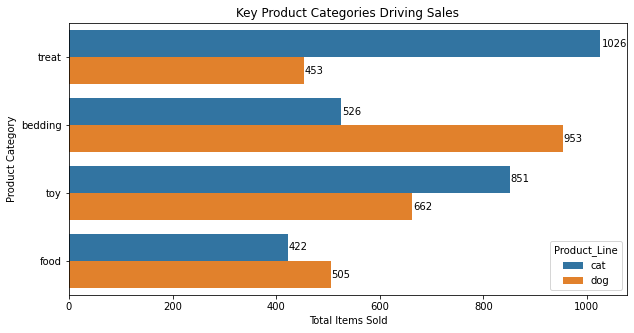

In [26]:
# Your code here
top_categories = (
    df.groupby(["Product_Line", "Product_Category"])["Quantity"].sum().reset_index()
)

# Sort for clarity
top_categories = top_categories.sort_values("Quantity", ascending=False)

plt.figure(figsize=(10, 5))

ax = sns.barplot(
    data=top_categories,
    x="Quantity", y="Product_Category",
    hue="Product_Line", orient="h"
)

# Add title and labels
ax.set_title("Key Product Categories Driving Sales")
ax.set_xlabel("Total Items Sold")
ax.set_ylabel("Product Category")

# Highlight top bars (optional annotation)
for p in ax.patches:
    width = p.get_width()
    ax.text(width+2, p.get_y()+p.get_height()/2,
            int(width), va="center")

# your code here

In [27]:
# Question 10 Grading Checks

assert isinstance(ax, plt.Axes), 'Did you assign the plot result to the variable ax?'